In [1]:
import matplotlib.pyplot as plt
import numpy as np
from smithwilson import RiskFreeRates

In [2]:
rates = np.array([0.01, 0.02, 0.026, 0.034])
maturities = np.array([1, 2, 3, 5])
projection = np.arange(1, 121)
ufr = 0.042

In [3]:
RFR = RiskFreeRates(rates, maturities, projection, ufr)
r = RFR.rates()

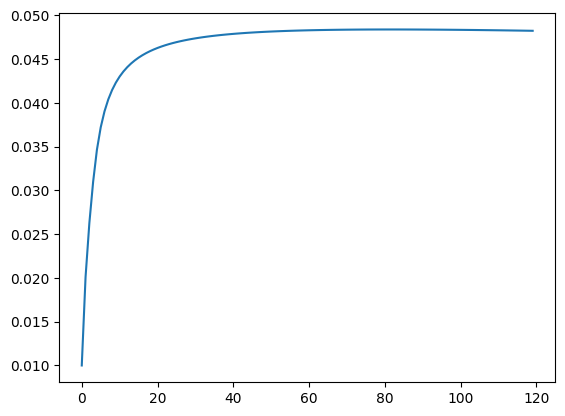

In [4]:
plt.plot(r)